In [1]:
#import ROOT
import numpy as np
import matplotlib.pyplot as plt
from melp import Detector
import melp
#from melp import TileAnalyzer
#import melp

Welcome to JupyROOT 6.24/06


In [2]:
#test = melp.TileHitAngle("sorted_truth.root", "outtest_1")
#test = melp.TileHitAngle("mu3e_run_050000.root", "outtest_big")

In [3]:
#mu3e_detector = dt.Detector(test.tile_id_pos, test.tile_id_pos, [0,1,2])

In [4]:
mu3e_detector = Detector.initFromROOT("sorted_truth.root")
#mu3e_detector = Detector.initFromSave("test_detector_file")

------------------------------
Detector geometry loaded

Stats:
  - Tiles:  5824
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [5]:
#mu3e_detector.save("test_detector_file")

In [6]:
melp.select(mu3e_detector)


In [7]:
print(mu3e_detector)

Detector(TileDetector=<melp.src.tile.TileDetector object at 0x7fcc88e89100>, SensorModules=<melp.src.sensor.SensorModule object at 0x7fcc88d2beb0>))


In [8]:
melp.addTileHits("sorted_truth.root", truth=True, traj=True)

In [9]:
mu3e_detector.TileDetector.tile[200000].hits[2].trajectory


Trajectory(id=512208, v_pos=[-5.838500625519842, -17.997088950353476, -1000.0], v_dir=[-1.7470295260085333, 1.264976496249885, 27.00752915576295], traj_type=3)

In [10]:
mu3e_detector.TileDetector.tile[200000].id



200000

In [11]:
mu3e_detector.info()

------------------------------
Detector information

Stats:
  - Tiles:  5824
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  [999]
  - Loaded Runs (Pixel):  []
------------------------------


In [12]:
melp.addSensorHits("sorted_truth.root", traj=True)

In [13]:
hitangle = melp.getHitAngle(rec_type="Helix")

In [14]:
print(hitangle[1])

[0.0, -41.53180487127131, -77.6548339997829, -117.18864112465698, -46.91486839774405, -47.7211534436445, -58.9777396274299, -163.55891050348018, -98.58145501567245, -70.94012792790615, -51.85853912918917, -128.1403946118923, -49.594485465764606, -22.146069937712035, -37.13988659914822, -75.95988662199314, -139.67242377891517, -90.87353309218808, -69.10192634668924, -0.9328692337178945, -132.073068262416, -105.10335963310541, -34.87555849789684, -53.20948984186729, -8.704892182199705, 0.9744972626874987, -39.204843135008105, -117.6061074211356, -11.955154111950469, -31.481683635147434, -31.26251325920476, 19.34440461235107, 174.5640484589233, -126.45379947531436, -114.58675737529785, -91.34794403622408, -40.124213936268085, -159.14478527084452, -101.33904018290535, -121.63105277002951, -36.34603379073119, -86.37735504870473, -68.92483268081841, 54.60005523843581, -45.408190347087285, -11.887172019374367, -48.901713787022445, -107.24804686643945, -117.16821202412964, -163.66650600107192,

In [15]:
mu3e_detector.info()

------------------------------
Detector information

Stats:
  - Tiles:  5824
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  [999]
  - Loaded Runs (Pixel):  [999]
------------------------------


In [16]:
mu3e_detector.SensorsModules.sensor[1].hit


[Hit(edep=0, mc_i=0, tid=22024, frame_id=0, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 18.97016643,  14.54688401, -55.07      ])),
 Hit(edep=0, mc_i=0, tid=4702, frame_id=1, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 24.60326656,   0.9473773 , -44.91      ])),
 Hit(edep=0, mc_i=0, tid=94, frame_id=8, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 18.14357022,  16.5424638 , -54.27      ])),
 Hit(edep=0, mc_i=0, tid=31822, frame_id=12, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 21.5417991 ,   8.33841356, -46.91      ])),
 Hit(edep=0, mc_i=0, tid=11713, frame_id=15, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 20.86827626,   9.96444153, -52.43      ])),
 Hit(edep=0, mc_i=0, tid=3719, frame_id=18, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 22.09286324,   7.00802703, -61.39      ])),
 Hit(edep=0, mc_i=0, tid=53522, frame_id=27, run_id=-1, hid=0, impact_vec=None, trajectory

In [25]:
mu3e_detector.TileDetector.tile[200000].hits

[Hit(edep=0.7147395218897714, mc_i=265209, tid=-1, frame_id=402, run_id=-1, hid=2, impact_vec=[-13.628506246579256, 18.092671121433845, -21.792333008309456], trajectory=Trajectory(id=306112, v_pos=[15.708332528683886, 13.352345710660344, -127.09882952656835], v_dir=[-23.895255906483168, 4.327973265846733, -32.47016542135671], traj_type=11), pos=None),
 Hit(edep=0.5166806201778021, mc_i=375658, tid=-1, frame_id=585, run_id=-1, hid=1, impact_vec=[-3.1662319664510483, -2.323038820056386, 2.792259599128979], trajectory=Trajectory(id=442361, v_pos=[26.35922696065687, 14.437816492154694, -904.8120401309121], v_dir=[-27.774359982483446, -29.050708588150467, 10.839828053951964], traj_type=11), pos=None),
 Hit(edep=1.1100909608317096, mc_i=427508, tid=-1, frame_id=668, run_id=-1, hid=4, impact_vec=[-1.143398366571151, 0.5007285042582083, -1.2169432040860333], trajectory=Trajectory(id=512208, v_pos=[-5.838500625519842, -17.997088950353476, -1000.0], v_dir=[-1.7470295260085333, 1.264976496249885,

In [17]:
binned_data, xedges, yedges = np.histogram2d(hitangle[0], hitangle[1], bins=[220, 180])

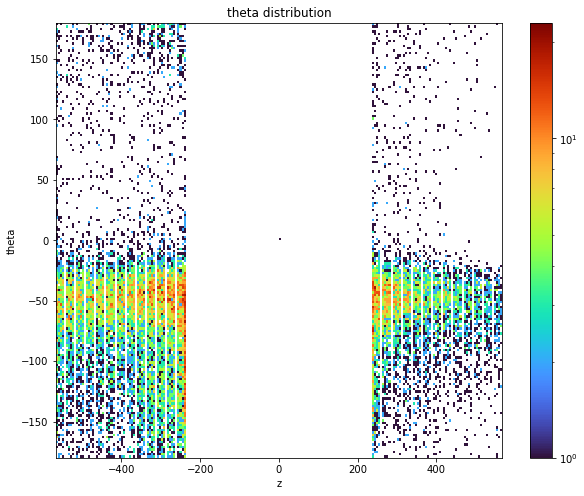

In [18]:
import numpy as np

fig = plt.figure(figsize=(10, 8))
import matplotlib as mpl
ax = fig.add_subplot(111, title='theta distribution')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, binned_data.T, cmap="turbo", norm = mpl.colors.LogNorm())
plt.ylabel("theta")
plt.xlabel("z")
plt.colorbar(im)
plt.show()